In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("raw_MB_enrich_data.xlsx",index_col=0)

In [4]:
dfplot = df.loc[df.cluster >22]

In [72]:
dfplot["sum_rich"] = dfplot.iloc[:, 1:].sum(axis=1)

In [79]:
dfplot2 = dfplot.loc[dfplot.sum_rich !=0].drop("sum_rich",axis=1)

In [84]:
dfplot_new = pd.DataFrame()
for cluster in dfplot2.cluster.unique():
    dftmp = dfplot2.loc[dfplot2.cluster == cluster]
    g = sns.clustermap(dftmp.iloc[:,1:],col_cluster=False,row_cluster=True,figsize=(5,5),cmap = "YlGnBu",vmax = 9)
    dftmp2 = dftmp.iloc[g.dendrogram_row.reordered_ind,:]
    dfplot_new = pd.concat([dfplot_new,dftmp2],axis=0)
    plt.close()

In [86]:
dfrow = dfplot[["cluster"]]

In [94]:
Set1_colors = plt.cm.Set3.colors
area_labels = dfrow.cluster.unique()
area_label_dict = dict(zip(area_labels, Set1_colors[:len(area_labels)]))

In [95]:
dfrow["area_color"] = [area_label_dict[item] for item in dfrow.cluster.tolist()]

C:\Users\win7\AppData\Local\Programs\Python\Python37\Lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


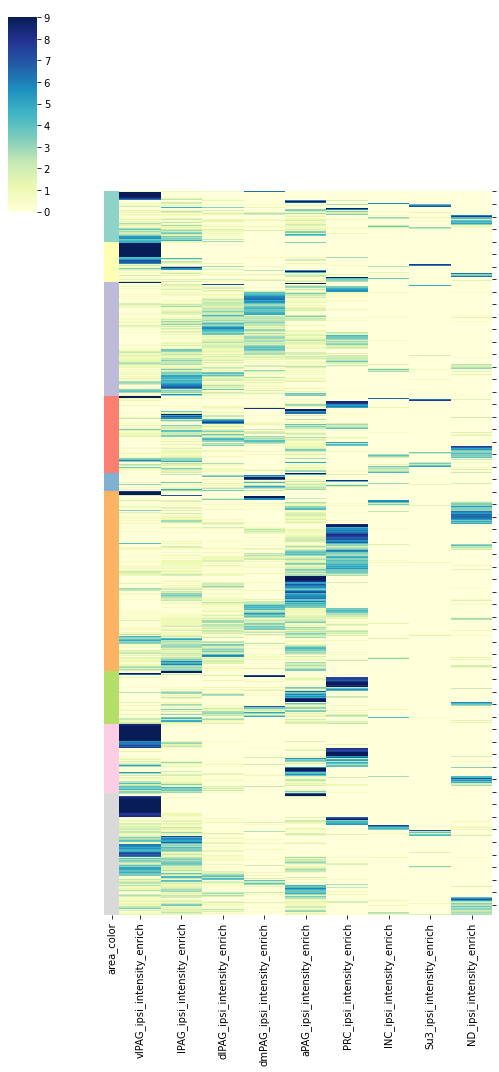

In [97]:
g = sns.clustermap(dfplot_new.iloc[:,1:],col_cluster=False,row_cluster=False,
row_colors=dfrow["area_color"],figsize=(8,15),cmap = "YlGnBu",vmax = 9)

g.ax_heatmap.set_yticklabels([])

plt.savefig("FigS7n.jpg",dpi = 300)
plt.savefig("FigS7n.pdf",dpi = 300)